<a href="https://colab.research.google.com/github/hscrown/bigdata/blob/main/03_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%EB%A1%9C_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8_%EB%B2%94%EC%9C%84_%EB%B0%96%EC%9D%98_%EC%83%98%ED%94%8C_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 선형회귀
*사례기반학습*인 KNN은 훈련 세트를 저장하는 것이 훈련의 전부. 훈련 세트를 초과하는 입력값에서는 작동을 못하는 단점이 있음

**모델기반학습** 인 선형회귀는 방정식(모델)을 세우고 데이터를 가장 잘 설명할 수 있는 모데 파라미터(선형회귀에서는 기울기와 절편)을 찾음

선형회귀로 농어 길이에 따른 무게 예측하기

In [5]:
# 데이터 준비
## 넘파이 어레이로 준비
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [7]:
# 사이킥런 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련세트와 테스트세트 중 인풋 값을 2차원 배열로 바꿈 (사이킥런은 인풋값으로 1차원 불가)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

In [9]:
# KNN 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # 훈련데이터 셋에 없는 큰 값을 넣어봄
# [1010.] 훈련 타깃값 중 제일 큰 값 반환하지만 한 참 모자름

[1010.]


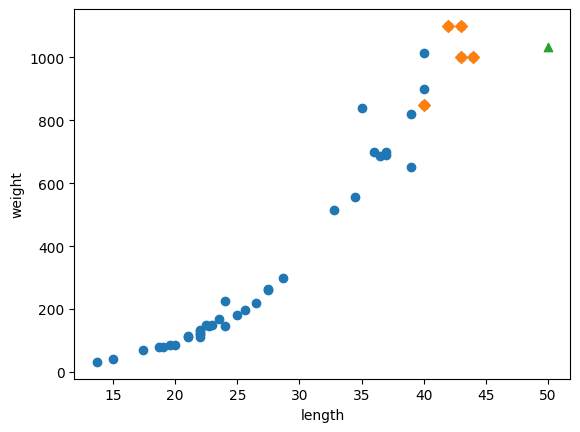

In [10]:
# KNN결과 시각화
import matplotlib.pyplot as plt
# 50cm 농어의 이웃 그리기
distances, indexes = knr.kneighbors([[50]]) # 이웃 다섯명

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 이웃 친구들의
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어데이터
plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가까운 이웃이 없네 45 이런 한창 차이나는 애들이랑 무게가 같다고 예측해버림.

In [11]:
print(np.mean(train_target[indexes])) # 이웃 친구들의 평균값

1010.0


In [13]:
print(knr.predict([[100]])) # 길이가 100인 농어의 무게도 # 이웃 친구들의 평균값 으로 예측

[1010.]


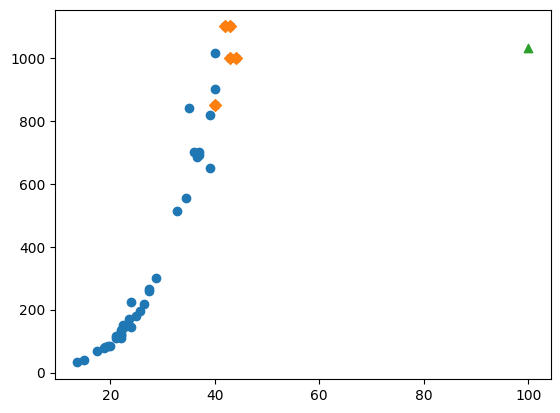

In [15]:
# 100cm 농어 그리기

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 이웃 친구들의
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어데이터
plt.scatter(100, 1033, marker='^')


### 선형 회귀

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 객체 생성
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


선형회귀 모델은 `coef_`에 계수(기울기)와 `inercept_`에 절편 값을 저장한다 (모델의 파라미터)

In [17]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


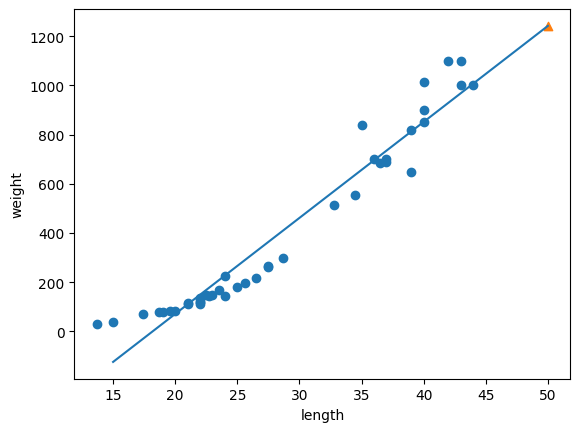

In [18]:
# 시각화
# x가 15에서 50까지이고, 훈련한 기울기와 절편으로 1차 방정식 그래프 그림
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 50cm 농어데이터
plt.scatter(50, 1241, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
# 훈련 세트와 테스트 세트에 대한 score 점수 계산(R2 점수)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 다항회귀
- 그래프를 좀 더 둥글려서 더 데이터에 적합한 그래프를 만들어보자
- $무게 = a*길이^2+ b$ 일때, $길이^2 = 왕눈이$ 와 같이 치환하면
다시 무게는 길이와 왕눈이의 선형관계로 표현 할 수 있으니까 다항회귀도 선형회귀라고 부를 수 있다고함

In [22]:
## 다항회귀를 위해 length 속성을 length를 제곱한 속성과 length로 만들어줌
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input)) # np.column_stack 두 어레이를 붙임 // concatenate와 반대 방향

In [23]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
# 다항회귀 훈련
# 똑같이 LinearRegression() 객체 선언하고 입력값으로 제곱한거랑 제곱안한거랑 주면 됨.
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [26]:
# 50cm 농어에 대한 예측
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [27]:
# 모델 가중치(계수,기울기), 편향 구하기
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


시각화

In [28]:
# 구간별 직선을 그리기 위해 15-49까지 정수배열 만들기
point = np.arange(15,50)

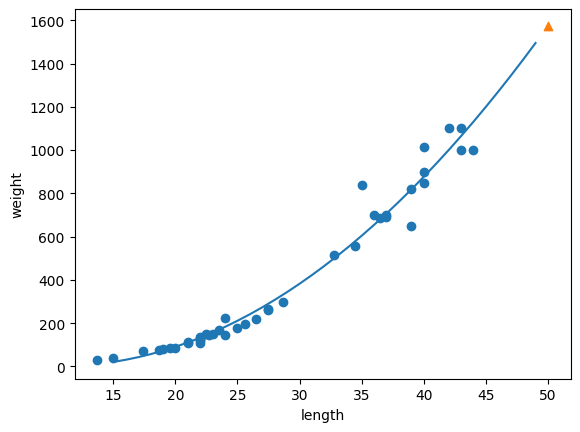

In [30]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 구한 모델 파라미터로 2차 방정식 그래프 그리기
plt.plot(point, lr.coef_[0]*point**2 +lr.coef_[1]*point + lr.intercept_ )

# 50cm 농어 데이터 그리기
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
# 다중회귀의 R2 스코어 구하기
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 더 좋은 점수

0.9706807451768623
0.9775935108325122


생각해볼점
```
# 구간별 직선을 그리기 위해 15-49까지 정수배열 만들기
point = np.arange(15,50)
```
이렇게 해서 그래프를 그리는 이유?